# More Distributions and Central Limit Theorem

---

## Import Libraries

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

## Loading Datasets

In [2]:
# Dataset
amir_deals = pd.read_csv('D:/git_repositories/Datacamp-Introduction_to_Statistics_in_Python/Data/amir_deals.csv', index_col = 0)

In [3]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [4]:
amir_deals.shape

(178, 5)

## The Normal Distribution

---

**Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.**

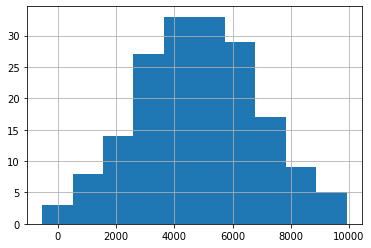

In [5]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins = 10)
plt.show()

#### Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of **amir_deals** and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

**1. What's the probability of Amir closing a deal worth less than $7500?**

In [6]:
from scipy.stats import norm

In [10]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print("The Probability of Amir closing a deal worth less than 7500 is " + str(round(prob_less_7500, 2)))

The Probability of Amir closing a deal worth less than 7500 is 0.89


**2. What's the probability of Amir closing a deal worth more than $1000?**

In [11]:
# Probability of deal > 1000
prob_over_1000 = norm.cdf(1000, 5000, 2000)

print("The probability of Amir closing a deal worth more than 1000 is " + str(round(prob_over_1000, 2)))

The probability of Amir closing a deal worth more than 1000 is 0.02
